# CAPSTONE 1: PREDICT IF CLIENT WILL SUBSCRIBE TO A TERM DEPOSIT  

This Capstone Project seeks to explore the following concepts:
- Exploratory Data Analysis
- Data Visualisation
- Data Classification: K-means clustering
- Data Correlation
- Predictive Analysis
- Machine Learning

#### IMPORT LIBRARIES

In [541]:
# import libraries

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from random import sample
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [542]:
# Import test and train data
# convert file to dataframe
# Inspect dataframe

train = pd.read_csv(r"C:\Users\fkole\Desktop\Kemi_Drive\Other_springboard\Capstone_1_project\bank-additional-full.csv", sep=';')
test = pd.read_csv(r"C:\Users\fkole\Desktop\Kemi_Drive\Other_springboard\Capstone_1_project\bank-additional.csv", sep=';')

#### DATA WRANGLING

In [543]:
# Inspect shape of data
print(train.shape)

(41188, 21)


In [544]:
# Data Cleaning: Drop Duplicates
train = train.drop_duplicates()
train.shape

(41176, 21)

In [545]:
train = train.drop(['duration'], axis=1)

In [546]:
train.shape

(41176, 20)

In [547]:
train = train.apply(lambda s: s.astype('category') if s.name in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] else s)

In [548]:
# View summary statistics

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
age               41176 non-null int64
job               41176 non-null category
marital           41176 non-null category
education         41176 non-null category
default           41176 non-null category
housing           41176 non-null category
loan              41176 non-null category
contact           41176 non-null category
month             41176 non-null category
day_of_week       41176 non-null category
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null category
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null category
dtypes: category(11), float64(5), int64(4)
memory usage: 3.6 MB


In [549]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [550]:
# Use Describe function to get summary statistics of data. 
train.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [551]:
# Examine the first 5 columns of the dataset
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [552]:
# Examine the last 5 columns of the dataset
train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [553]:
#Create a random index
randomIndex = np.array(sample(range(len(train)),5))
# Get 5 random rows
trainSample = train.loc[randomIndex]

# Print the sample
trainSample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17000,43,blue-collar,married,basic.9y,unknown,yes,no,cellular,jul,thu,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
19417,33,technician,married,high.school,no,yes,yes,cellular,aug,wed,4,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
13525,36,blue-collar,married,basic.9y,unknown,yes,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
19795,44,admin.,divorced,university.degree,no,no,no,cellular,aug,fri,6,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
34648,31,technician,single,basic.9y,no,yes,no,cellular,may,thu,1,11,1,success,-1.8,92.893,-46.2,1.266,5099.1,yes


In [554]:
#Examine all the columns in data set, to check that column names are consistent, and without unnecessary spaces 
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [555]:
# Examine all the columns in data set, to check that column names are consistent, and without unnecessary spaces 


In [556]:
# Data Cleaning: Identify outliers using Z-Score
z_columns = train.loc[:,['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [557]:
z = np.abs(stats.zscore(z_columns))
print(z)

[[1.53314313 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 [1.62910732 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 [0.29017656 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 ...
 [1.53314313 0.20498953 0.19544346 ... 2.22505906 1.49519696 2.81568858]
 [0.3815728  0.56596326 0.19544346 ... 2.22505906 1.49519696 2.81568858]
 [3.26049862 0.1559842  0.19544346 ... 2.22505906 1.49519696 2.81568858]]


In [558]:
Q1 = z_columns.quantile(0.25)
Q3 = z_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [559]:
print(z_columns < (Q1 - 1.5 * IQR)) , (z_columns > (Q3 + 1.5 * IQR))

         age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      False     False  False     False         False           False   
1      False     False  False     False         False           False   
2      False     False  False     False         False           False   
3      False     False  False     False         False           False   
4      False     False  False     False         False           False   
5      False     False  False     False         False           False   
6      False     False  False     False         False           False   
7      False     False  False     False         False           False   
8      False     False  False     False         False           False   
9      False     False  False     False         False           False   
10     False     False  False     False         False           False   
11     False     False  False     False         False           False   
12     False     False  False     False         Fal

(None,          age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 0      False     False  False     False         False           False   
 1      False     False  False     False         False           False   
 2      False     False  False     False         False           False   
 3      False     False  False     False         False           False   
 4      False     False  False     False         False           False   
 5      False     False  False     False         False           False   
 6      False     False  False     False         False           False   
 7      False     False  False     False         False           False   
 8      False     False  False     False         False           False   
 9      False     False  False     False         False           False   
 10     False     False  False     False         False           False   
 11     False     False  False     False         False           False   
 12     False     False  False  

In [560]:
#Frequency count
train.job.value_counts(dropna=False)


admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [561]:
print(str(train.job.value_counts(dropna=False).unknown/train.job.count()*100) +  " %")

0.8014377307169226 %


In [562]:
#Frequency count
train.marital.value_counts(dropna=False)

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [563]:
print(str(train.marital.value_counts(dropna=False).unknown/train.marital.count()*100) +  " %")

0.19428793471925393 %


In [564]:
#Frequency count
train.education.value_counts(dropna=False)

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [565]:
print(str(train.education.value_counts(dropna=False).unknown/train.education.count()*100) +  " %")

4.2014765883038665 %


In [566]:
#Frequency count
train.default.value_counts(dropna=False)

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [567]:
print(str(train.default.value_counts(dropna=False).unknown/train.default.count()*100) +  " %")

20.876238585583835 %


In [568]:
#Frequency count
train.housing.value_counts(dropna=False)

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [569]:
print(str(train.housing.value_counts(dropna=False).unknown/train.housing.count()*100) +  " %")

2.4043131921507674 %


In [570]:
#Frequency count
train.loan.value_counts(dropna=False)

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [571]:
print(str(train.loan.value_counts(dropna=False).unknown/train.loan.count()*100) +  " %")

2.4043131921507674 %


In [572]:
#Frequency count
train.contact.value_counts(dropna=False)

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [573]:
#Frequency count
train.poutcome.value_counts(dropna=False)

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [574]:
print(str(train.poutcome.value_counts(dropna=False).nonexistent/train.poutcome.count()*100) +  " %")

86.33912959005245 %


In [575]:
#Frequency count
train.month.value_counts(dropna=False)

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [576]:
#Frequency count
train.day_of_week.value_counts(dropna=False)

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [577]:
#Frequency count
train.y.value_counts(dropna=False)

no     36537
yes     4639
Name: y, dtype: int64

#### EXPLORATORY DATA ANALYSIS AND VISUALISATION

In [578]:
# Calculate percentage of successful oucome of current campaign
print(str(train.y.value_counts(dropna=False).yes/train.y.count()*100) +  " %")

11.266271614532737 %


Pie chart shows that the percentage of successful oucome of marketing campaign is only 11.27%. By predicting the profile of customers that are most likely to sign up for the Term deposit, we can achieve a more targeted, cost effective, and very profitable strategy for Term deposit marketing

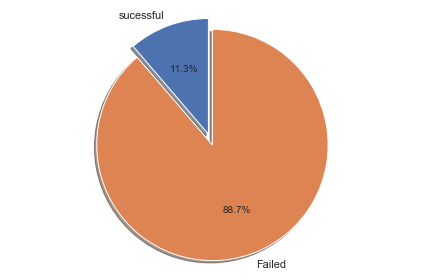

In [579]:


labels = ['sucessful', 'Failed']
sizes = [11.27, 88.73]
# only "explode" the 'successful' slice
explode = (0, 0.1,)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

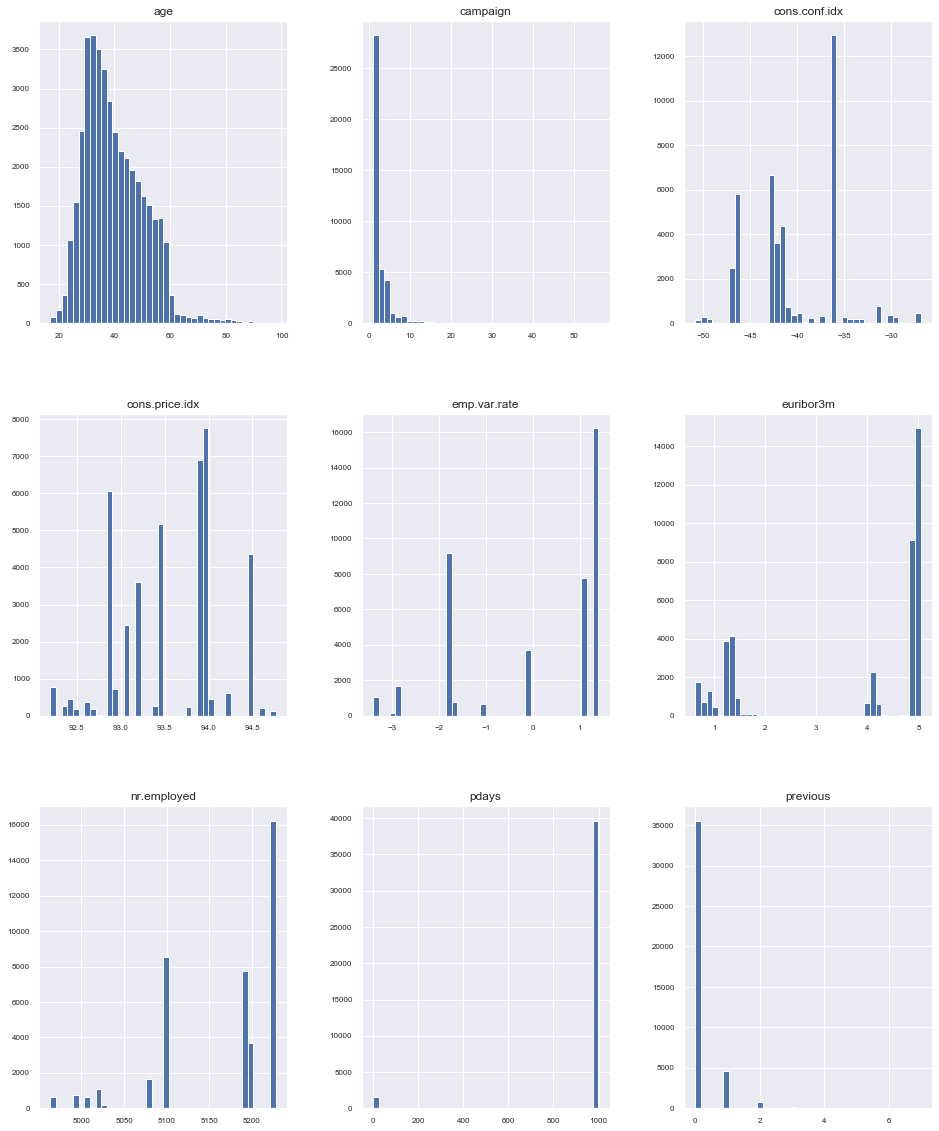

In [586]:
# Histograms below show the distributions of numeric data
train_cat = train.select_dtypes(include = ['float64', 'int64','category'])
train_cat.hist(figsize=(16,20), bins=40,xlabelsize=8, ylabelsize=8);

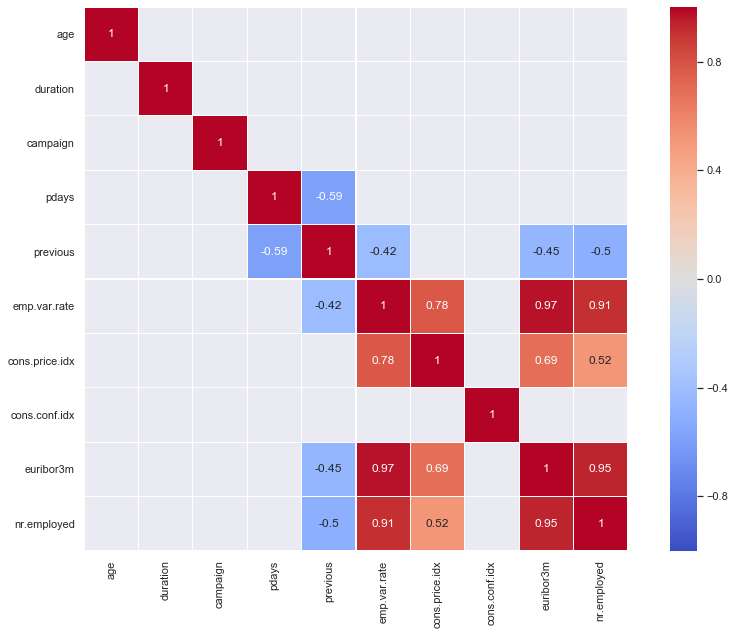

In [581]:
# The heatmap below gives an indication of which relationships should be further investigated
plt.subplots(figsize=(15,10))
sns.heatmap(corr[(corr>=0.4)|(corr<=-0.4)], cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1, 
annot=True, annot_kws={"size":12}, square=True);

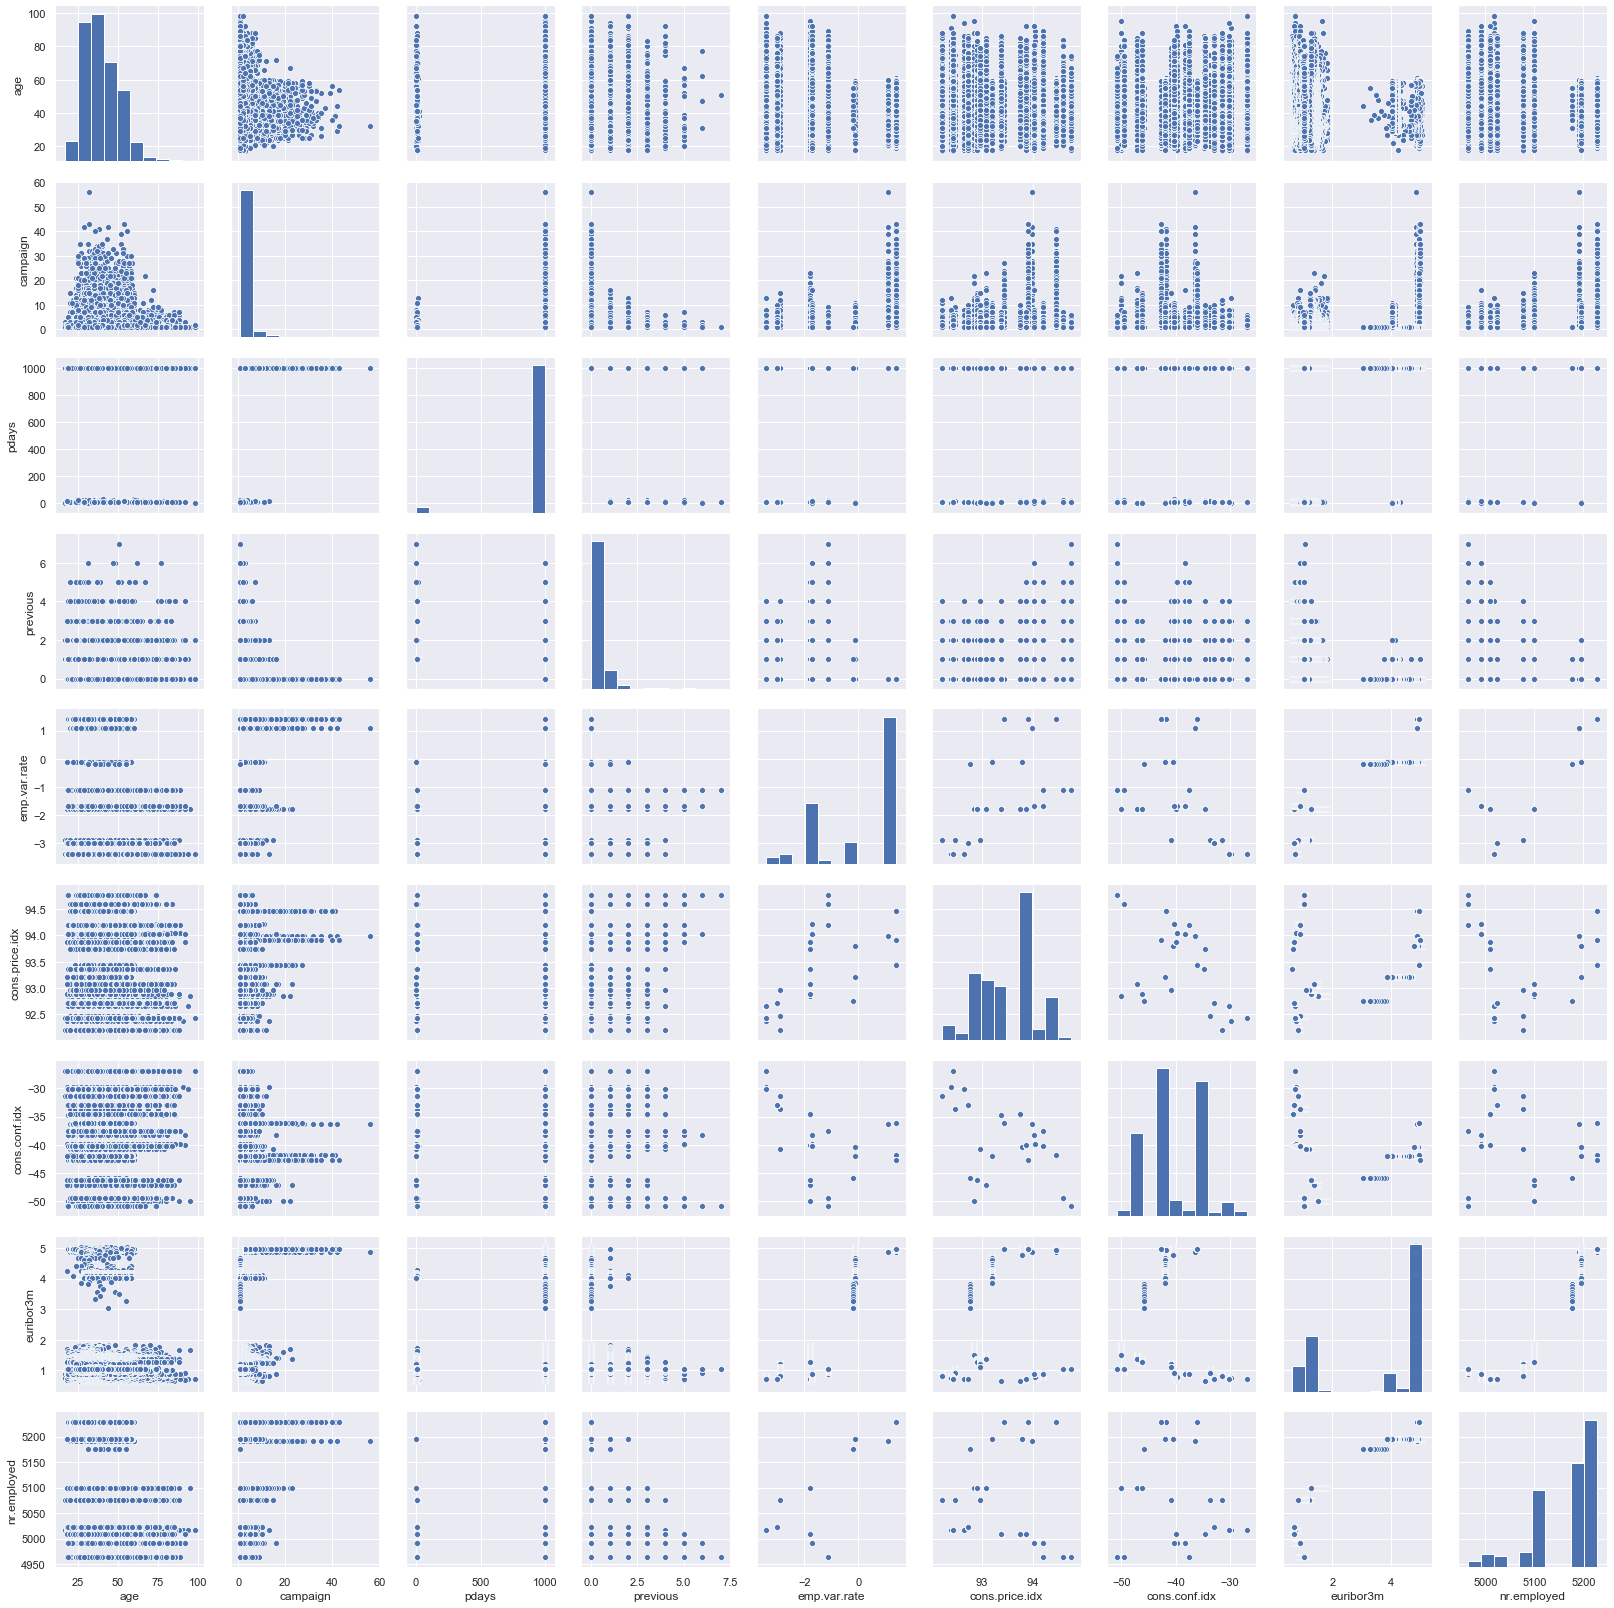

In [582]:
sns.pairplot(train)